# AAV TP 3 : Analyse des formants

Dans ce TP, vous analyserez les données formantiques des voyelles
enregistrées au TP1. Le but sera d'apprendre à manipuler des données
expérimentales, à les afficher et à faire quelques analyses élémentaires.

## 0. Préparation
- Lire le sujet de ce TP et préparer des questions, si besoin.

In [5]:
import numpy as np
import matplotlib.pyplot as plt

## I. Les données
Le fichier au format pickle contenant les données des voyelles se trouve sur Claroline.
Vous pouvez le charger dans Python à l'aide de la fonction *pickle.load*.

In [6]:
import pickle
with open("vowels.pkl", "rb") as f:
    data = pickle.load(f)

*data* est un dictionnaire, associant des *clés* à des *valeurs.
Affichez les clés avec *data.keys()*.

In [7]:
print(data.keys())

dict_keys(['F1', 'F2', 'F3', 'F4', 'height', 'weight', 'language', 'vowel', 'subject', 'sex'])


Les clés *F1, F2, F3, F4* sont des tableaux qui contiennent les valeurs des formants. *vowel*, de même taille que les tableaux formantiques, indique la voyelle prononcée dans chaque cas, de même que les tableaux *subject* et *sex*, pour les locuteurs et leur sexe. Les tableaux *height, weight* et *language* indiquent respectivement la taille, le poids et la langue de chaque locuteur.

In [8]:
print(type(data["height"]))
print(data["height"])

<class 'numpy.ndarray'>
[1.85 1.7  1.65 1.74 1.71 1.7  1.63 1.76 1.65 1.6  1.55 1.83 1.82 1.67
 1.7  1.7 ]


## II. $F_1 \times F_2$
1. Affichez les données des deux premiers
formants avec l'orientation des axes classiques (cf TP01 : $F_1$ en
ordonnées, valeurs croissantes vers le bas, et $F_2$ en abscisse, valeurs
croissants vers la gauche. \
Pour modifier les axes, regardez les méthodes de l'objet retourné par *plt.gca()* une fois une figure affichée. \
Utilisez le style « . » de la commande *plt.plot()* pour ne pas relier les points. \
Ajoutez des légendes aux axes indiquant l'unité de mesure des formants.

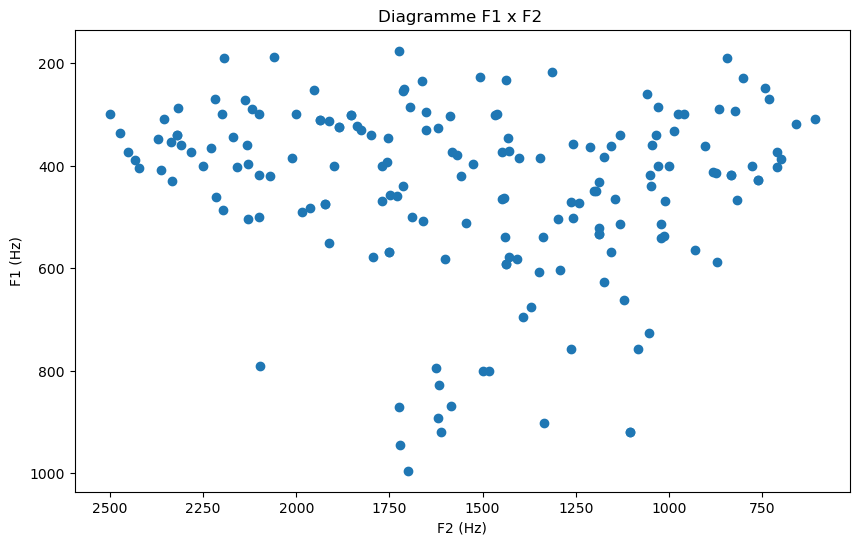

In [9]:
#données F1 et F2
F1=data["F1"]
F2=data["F2"]

#on créer une figure 
plt.figure(figsize=(10, 6))

#graphe 
plt.plot(F2, F1, 'o') #F2 en fonction de F1 et o-> nuage de points 

#retourné l'axe de façon a obtenir les valeurs croissantes vers le bas
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()

#légende
plt.xlabel('F2 (Hz)')
plt.ylabel('F1 (Hz)')
plt.title('Diagramme F1 x F2 ')
plt.show()


2. Sauriez-vous dire où se trouvent les voyelles /a/, /i/ et /u/ ?

- La voyelle /a/ possède un F2 à 1500 Hz et le plus grand formant F1 (zone rouge)

- La voyelle /i/ possède un petit formant F1 et le plus grand formant F2 (zone orange)

- La votelle /u/ possède un petit formant F1 et un petit formant F2 (zone verte)

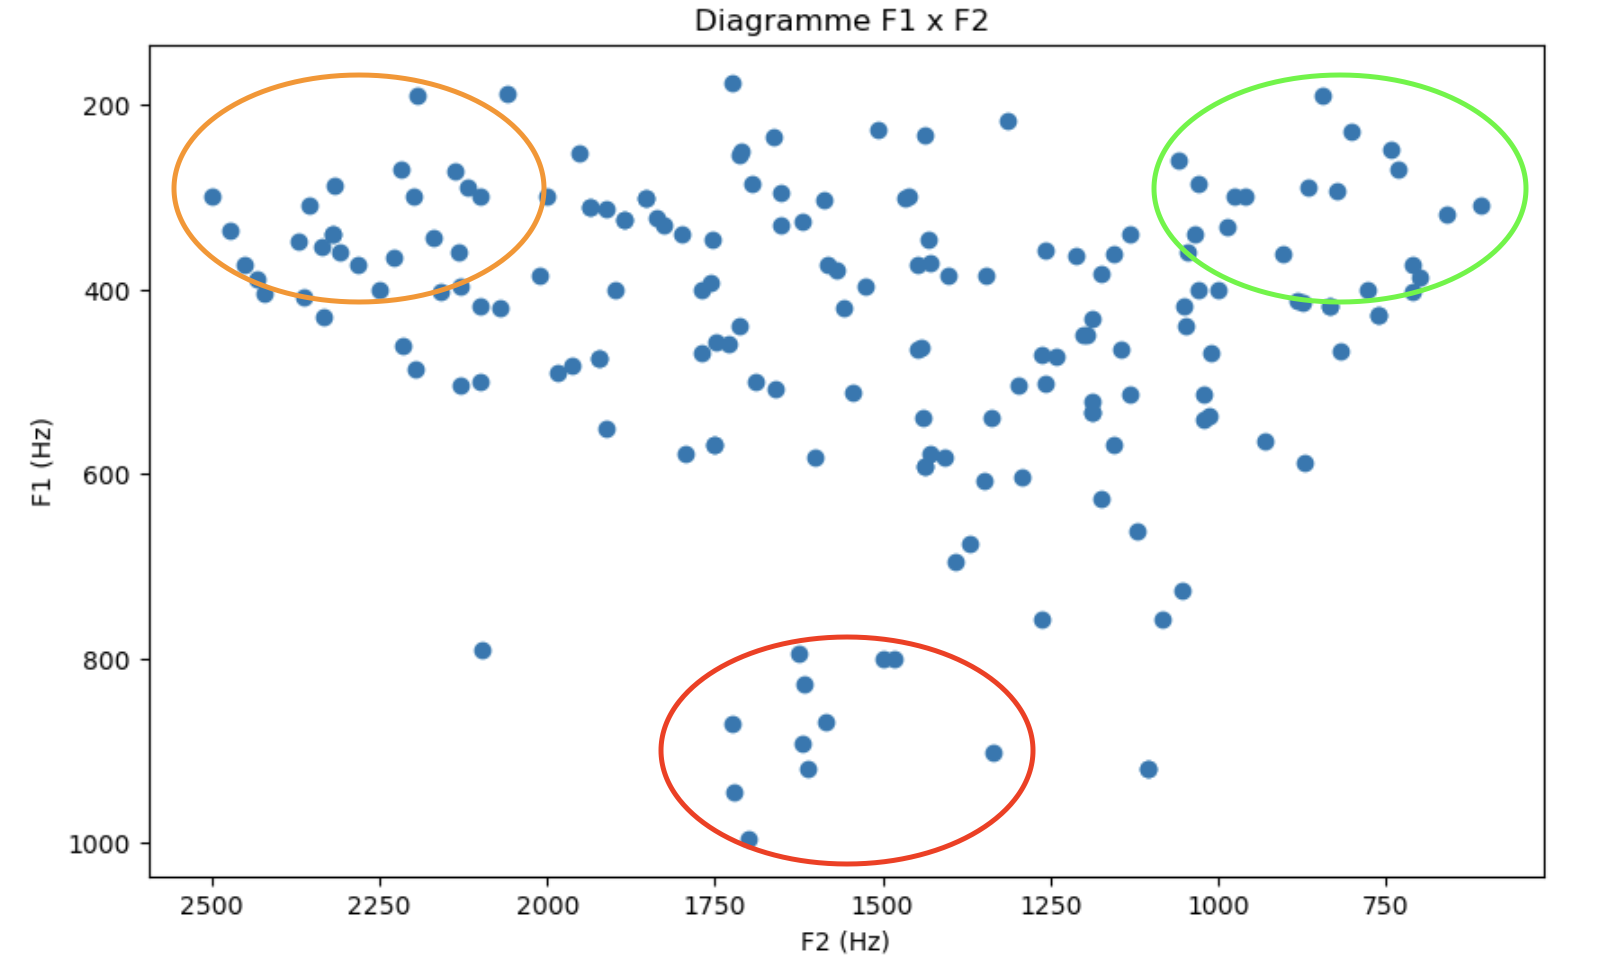


## III. Différences entre les femmes et les hommes
1. Refaites le graphique
de la question précédente en donnant des couleurs différentes pour les
points des femmes et des hommes.  (Suggestion : utilisez la comparaison
« == » pour extraire les indices pertinents du tableau *sex*).

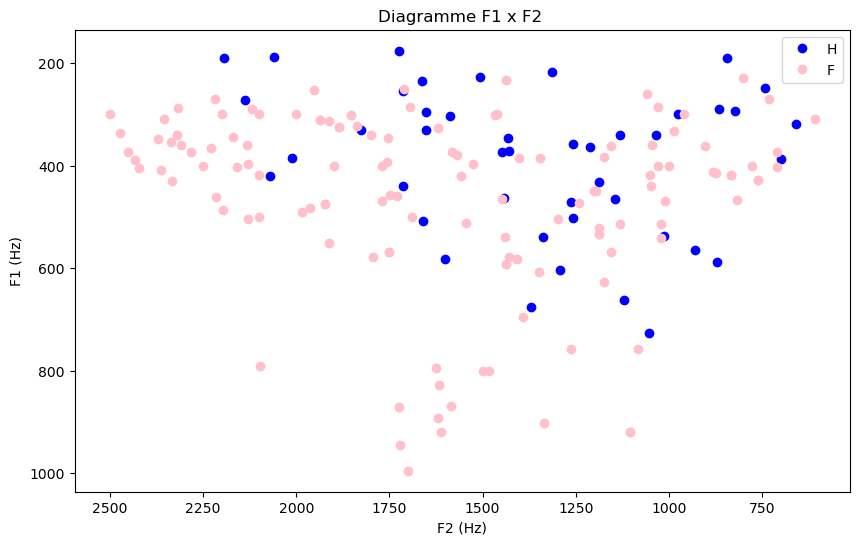

In [11]:
#couleurs différentes si homme ou femme

#on extrait deux array contenant les données sur le sexe (on sait que pour femme on a F et homme H)
H=data['sex']=='H'
F=data['sex']=='F'

#on trace 
#on créer une figure 
plt.figure(figsize=(10, 6))

#graphe 
plt.plot(F2[H], F1[H], 'o',label='H', color='blue') 
plt.plot(F2[F], F1[F], 'o',label='F', color='pink') 


#retourné l'axe de façon a obtenir les valeurs croissantes vers le bas
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()

#légende
plt.xlabel('F2 (Hz)')
plt.ylabel('F1 (Hz)')
plt.title('Diagramme F1 x F2 ')
plt.legend()
plt.show()

2. Qu'observez-vous ?

<span style="color:blue">
On observe une legère différence dans la position ndes formants, les formants des femmes on un F1 plus élevés (en Hz) que ceux des hommes, cela peut être du simplement en raison des différences physiologiques. 

Conclusion : Pour une voix de femme les fréquences sont sensiblement supérieures que pour un homme. Mais la différence reste négligeable
</span>    

## IV. $F_3 \times F_4$
1. Affichez les données des formants $F_3$ et $F_4$ sur
un graphique, en donnant des couleurs différentes aux données des femmes et
des hommes, comme dans la question précédente.

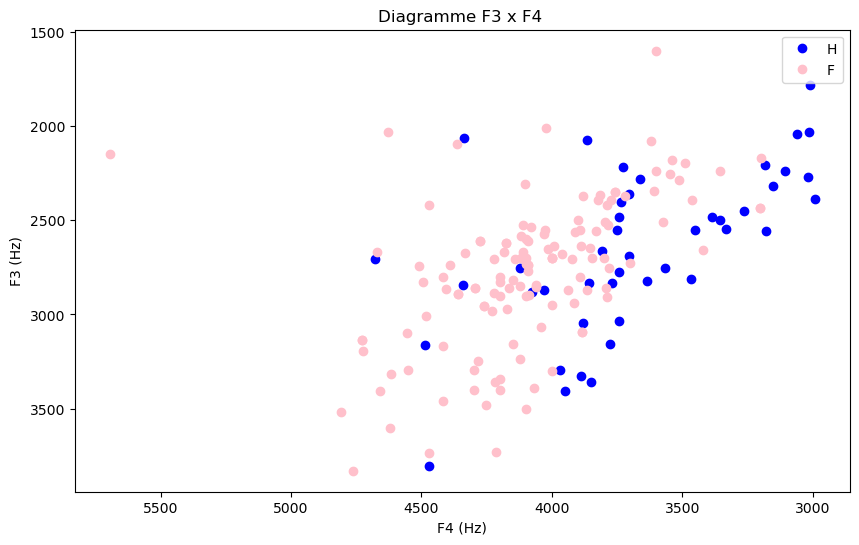

In [13]:
#données F3 et F4
F3=data["F3"]
F4=data["F4"]
#on extrait deux array contenant les données sur le sexe (on sait que pour femme on a F et homme H)
Ho=data['sex']=='H'
Fe=data['sex']=='F'

#on trace 
#on créer une figure 
plt.figure(figsize=(10, 6))

#graphe 
plt.plot(F4[Ho], F3[Ho], 'o',label='H', color='blue') 
plt.plot(F4[Fe], F3[Fe], 'o',label='F', color='pink') 


#retourné l'axe de façon a obtenir les valeurs croissantes vers le bas
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()

#légende
plt.xlabel('F4 (Hz)')
plt.ylabel('F3 (Hz)')
plt.title('Diagramme F3 x F4 ')
plt.legend()
plt.show()

2. Qu'observez-vous ?  Que pouvez-vous dire au sujet la corrélation entre $F_3$ et $F_4$ ?

<span style="color:blue">
Cette fois ci la différence entre les femmes et les hommes est plus visible. 
Les formants F3 et F4 pour les hommes (points bleus) tendent à être plus concentrés sur F4[3000;4000]Hz  et F3[1500;3000]Hz
    

Pour les femmes (points roses) montrent une plus grande dispersion dans les valeurs F4[3700;4700]Hz  et F3[1500;4000]Hz 

Il y a donc une corrélation entre l'emplacement des formants F3 et F4 et le sex de l'interlocuteur. </span>  

## V. Estimation de la longueur du conduit vocal
1. Rappelez-vous la
formule de calcul des formants d'un tuyau uniforme (cf TP01).  Justifiez
les formules, avec $c$ la vitesse du son et $l$ la longueur du conduit
vocal :

$\mathrm{F}_3 \approx \frac{c}{4l/5}$ et
$\mathrm{F}_4 \approx \frac{c}{4l/7}$

<span style="color:blue">
Comme on a :
$\mathrm{F}_n = \frac{(2n - 1) \cdot c}{4L}$

Si $n = 3$, le résultat est $\mathrm{F}_3 \approx \frac{c}{4L/5}$.

Si $n = 4$, le résultat est $\mathrm{F}_4 \approx \frac{c}{4L/7}$.</span>

2. Calculez maintenant les valeurs moyennes de $F_3$ et $F_4$ à travers toutes les
voyelles de chaque locuteur.
Mettez-les dans deux tableaux appelés *F3_locuteur* et *F4_locuteur*.
Affichez-les dans le plan $F_3\times F_4$.

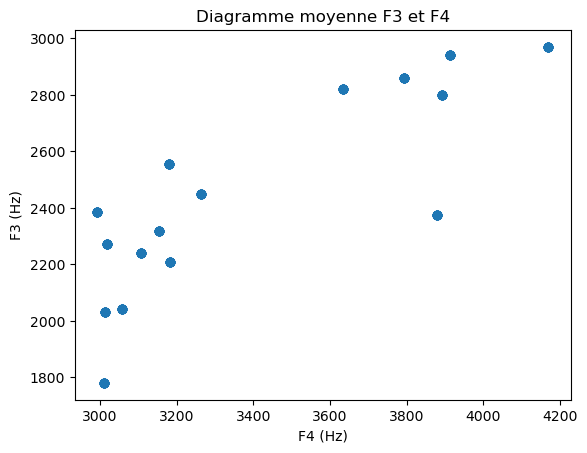

In [20]:
#Calcul de la valeurs moyennes de F3 et F4 
#initialisation des tableau F3 et F4 locuteur
F3_locuteur = []
F4_locuteur = []

locuteur=data['subject']
for i in locuteur:
    moyenne_F3=np.mean(F3[i]) #calcul de la moyenne des F3 
    F3_locuteur.append(moyenne_F3) #ajout de la valeur dans le tableau
    moyenne_F4=np.mean(F4[i])
    F4_locuteur.append(moyenne_F4)
    
#on trace 
plt.plot(F4_locuteur, F3_locuteur, 'o')
plt.xlabel('F4 (Hz)')
plt.ylabel('F3 (Hz)')
plt.title('Diagramme moyenne F3 et F4')
plt.show()


3. Qu'observez-vous maintenant ?

<span style="color:blue">
Nous confirmons la corrélation entre F3 et F4. En effet, Les valeurs plus élevées de  F4 correpondent aux valeurs plus élevées de F3 </span> 

4. Faites la régression linéaire entre les valeurs de $F_3$ et $F_4$ moyennées par
locuteurs en utilisant le code suivant (expliquez cette
ligne de code) :

In [18]:
coefficients = np.polyfit(F3_locuteur, F4_locuteur, 1)
print(coefficients)

[9.55151220e-01 1.06031277e+03]


<span style="color:blue">
D'après la documentation de numpy, la fonction np.polyfit permet de calculer les coefficients d'un polynôme qui ajuste au mieux les donnée. Dans notre cas F3_locuteur, F4_locuteur sont les deux variables à analyser et deg=1 est le degré du polynôme d'ajustement(1=droite ax+b)
La fonction revoie un vecteur de coefficients p qui minimise l'erreur quadratique dans l'ordre deg</span>

5. Comment pouvez-vous interpréter ce résultat à la lumière des formules
théoriques de $F_3$ et $F_4$ pour le tuyau uniforme ?

<span style="color:blue">
Nous remarquons une correlation entre F3 et F4 donc nous pouvons dire que F3 proportionnel à F4.
Or 

$\mathrm{F}_3 \approx \frac{c}{4l/5}$ et
$\mathrm{F}_4 \approx \frac{c}{4l/7}$

Si on calcul le rapport : 
$\frac{\mathrm{F}_3}{\mathrm{F}_4} \approx \frac{\frac{c}{\frac{4l}{5}}}{\frac{c}{\frac{4l}{7}}}$

$\frac{\mathrm{F}_3}{\mathrm{F}_4} \approx \frac{7}{5}$



Alors on a donc $\mathrm{F}_3 = \frac{7}{5} \times \mathrm{F}_4$

</span>

6. Affichez les valeurs moyennes de $F_3$ et $F_4$ en fonction de la taille, du
poids et de l'indice de masse corporelle (IMC = poids/taille$^2$, en
kg/m$^2$). Discutez le résultat. Donnez une raison pour l'utilisation de l'IMC.

In [39]:
# Liste vide des valeurs qu'on a 
F3_taille = []
F4_taille = []
F3_poids = []
F4_poids = []



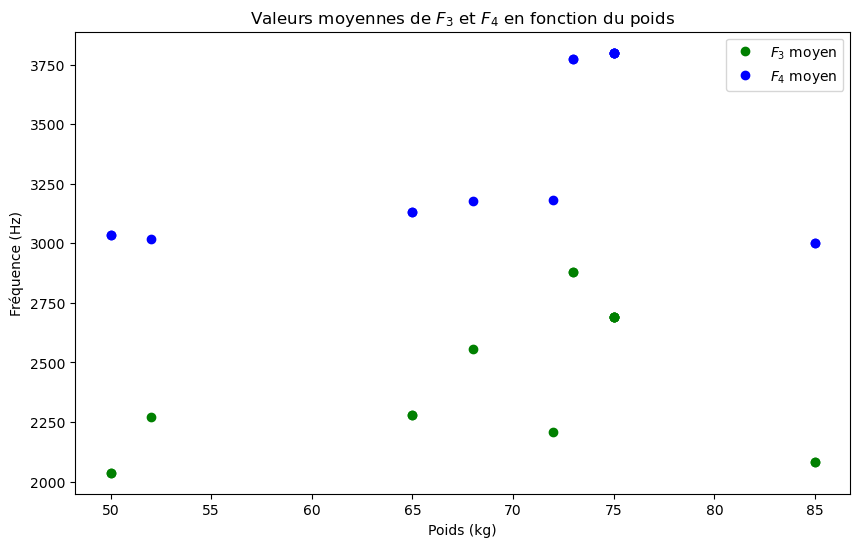

In [40]:
##F3 et F4 en fonction du poids
for poids in data['weight']:
    i = np.where(data['weight'] == poids)[0]
    F3_moyen_poids = np.mean(data['F3'][i])
    F4_moyen_poids = np.mean(data['F4'][i])
    F3_poids.append(F3_moyen_poids)
    F4_poids.append(F4_moyen_poids)
    
# graphique en fonction du poids
plt.figure(figsize=(10, 6))
plt.plot(data['weight'], F3_poids, 'o', label='$F_3$ moyen', color='green')
plt.plot(data['weight'], F4_poids, 'o', label='$F_4$ moyen', color='blue')
plt.xlabel('Poids (kg)')
plt.ylabel('Fréquence (Hz)')
plt.title('Valeurs moyennes de $F_3$ et $F_4$ en fonction du poids')
plt.legend()
plt.show()

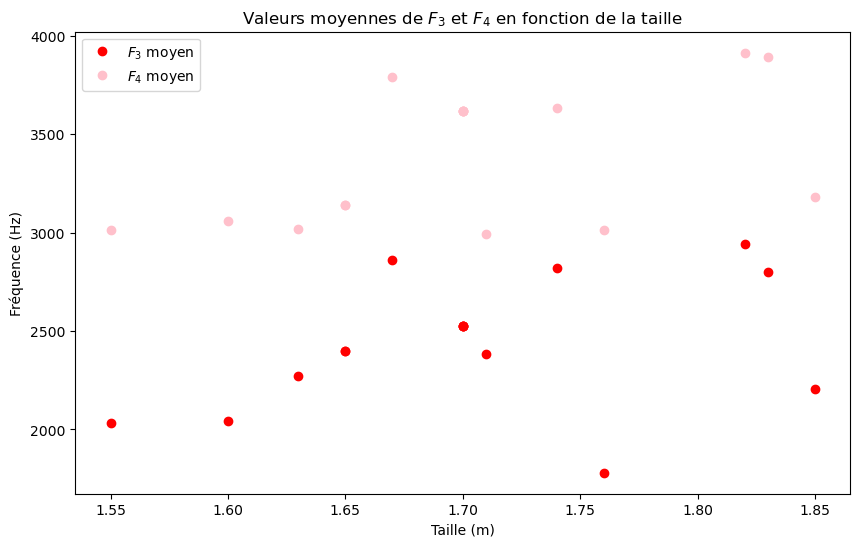

In [41]:
#F3 et F4 en fonction du taille 
for taille in data['height']:
    i = np.where(data['height'] == taille)[0]  
    F3_moyen_taille = np.mean(data['F3'][i])
    F4_moyen_taille = np.mean(data['F4'][i])
    F3_taille.append(F3_moyen_taille)
    F4_taille.append(F4_moyen_taille)
    
# Tracé du graphique en fonction de la taille
plt.figure(figsize=(10, 6))
plt.plot(data['height'], F3_taille, 'o', label='$F_3$ moyen', color='red')
plt.plot(data['height'], F4_taille, 'o', label='$F_4$ moyen', color='pink')
plt.xlabel('Taille (m)')
plt.ylabel('Fréquence (Hz)')
plt.title('Valeurs moyennes de $F_3$ et $F_4$ en fonction de la taille')
plt.legend()
plt.show()

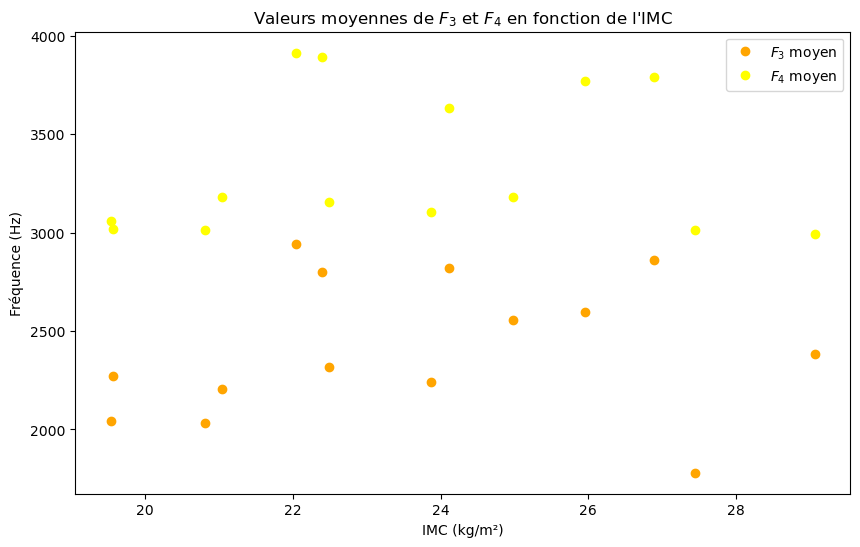

In [51]:
# Calcul de l'IMC 
IMC = data['weight'] / (data['height']**2)
data['IMC'] = IMC

# Initialisation moyennes de F3 et F4 en fonction de l'IMC
F3_imc = []
F4_imc = []

# Récupération des valeurs uniques de l'IMC
IMC_uniques = np.unique(data['IMC'])

# boucle for comme dab 
for imc in IMC_uniques:
    i = np.where(data['IMC'] == imc)[0]
    F3_moyen_imc = np.mean(data['F3'][i])
    F4_moyen_imc = np.mean(data['F4'][i])
    F3_imc.append(F3_moyen_imc)
    F4_imc.append(F4_moyen_imc)

# graphique en fonction de l'IMC
plt.figure(figsize=(10, 6))
plt.plot(IMC_uniques, F3_imc, 'o', label='$F_3$ moyen', color='orange')
plt.plot(IMC_uniques, F4_imc, 'o', label='$F_4$ moyen', color='yellow')
plt.xlabel('IMC (kg/m²)')
plt.ylabel('Fréquence (Hz)')
plt.title('Valeurs moyennes de $F_3$ et $F_4$ en fonction de l\'IMC')
plt.legend()
plt.show()

<span style="color:blue">
    
- Poids : On remarque une correlation entre le poids et les formants F3 et F4. Plus le poids augmente plus les formants augmente aussi 
    
- Taille : On pourrait dire de même pour la taille, à l'exception de quelques points on peut remarquer la corrélation en tre les formants F3 et F4 et la taille.
    
- IMC : Pour l'IMC, la dispertion est plus notable, donc j'aurai tendance à dire qu'il n'y pas de corrélation entre l'IMC et les formants. On remarque plus un nuage de points que une droite.

Cependant, pour les trois graphes on remarque que les formants F4 (Hz) sont plus grands que F3 (Hz)</span> 

## VI. Distribution des voyelles

1. Reprenez le graphique de $F_1\times F_2$, mais au lieu d'afficher toutes les
mesures, calculez les valeurs moyennes de chaque voyelle pour chaque sexe
et superposez les ellipses de dispersion en utilisant la fonction *ellipse_from_points*.

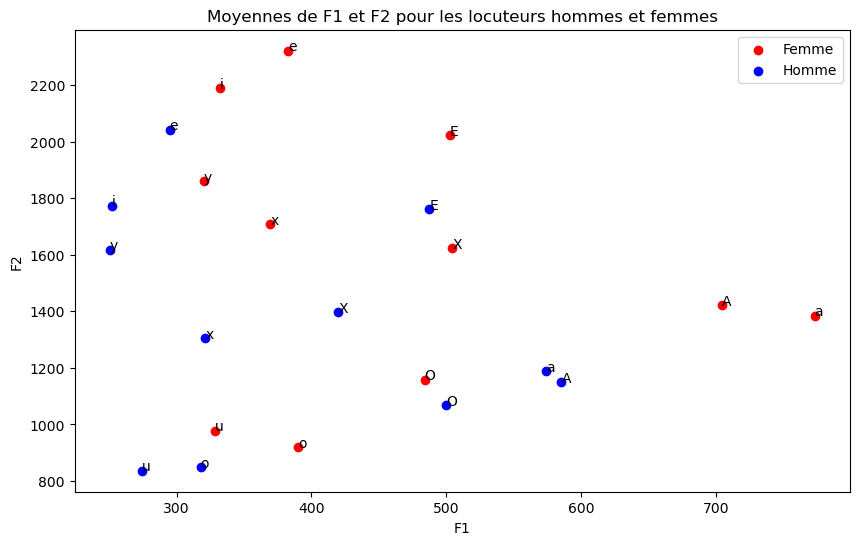

In [65]:
def ellipse_from_points(x, y):  # en entrée, les coordonnées des points dont on veut l'ellipse de dispersion
    cov = np.cov(x, y)
    w, v = np.linalg.eig(cov)
    a, b = np.sqrt(w)
    t = np.linspace(0, 2*np.pi, 100)
    xt, yt = a*np.cos(t), b*np.sin(t)
    ra = np.arctan2(v[1, 0], v[0, 0])
    cos_ra, sin_ra = np.cos(ra), np.sin(ra)
    ex = xt * cos_ra - yt * sin_ra + np.mean(x)
    ey = xt * sin_ra + yt * cos_ra + np.mean(y)
    return ex, ey

# TODO
#Calcul de la valeurs moyennes de F1 et F2 
#initialisation des tableau F1 et F2 locuteur pour homme et femme
F1_femme = []
F2_femme = []
F1_homme = []
F2_homme = []

#Calcul des moyennes selon deux critrès : homme ou femme et type de la voyelle
for i in np.unique(data['vowel']):
    i_f=np.where((data['sex'] == 'F') & (data['vowel'] == i))[0] 
    i_h=np.where((data['sex'] == 'H') & (data['vowel'] == i))[0]
    #femme
    moyenne_femme_F1=np.mean(data['F1'][i_f]) #calcul de la moyenne des F1 en fonctionn de la moyenne
    F1_femme.append(moyenne_femme_F1) #ajout de la valeur dans le tableau
    moyenne_femme_F2=np.mean(data['F2'][i_f]) 
    F2_femme.append(moyenne_femme_F2)
    
    #homme
    moyenne_homme_F1=np.mean(data['F1'][i_h]) #calcul de la moyenne des F1 en fonctionn de la moyenne
    F1_homme.append(moyenne_homme_F1) #ajout de la valeur dans le tableau
    moyenne_homme_F2=np.mean(data['F2'][i_h]) 
    F2_homme.append(moyenne_homme_F2)


#on trace 
plt.figure(figsize=(10, 6))
plt.scatter(F1_femme, F2_femme, color='red', label='Femme')
plt.scatter(F1_homme, F2_homme, color='blue', label='Homme')

# etiquettes pour chaque point
for i, vowel in enumerate(np.unique(data['vowel'])):
    plt.text(F1_femme[i], F2_femme[i], vowel)
    plt.text(F1_homme[i], F2_homme[i], vowel)
plt.xlabel('F1')
plt.ylabel('F2')
plt.title('Moyennes de F1 et F2 pour les locuteurs hommes et femmes')
plt.legend()
plt.show()

#j'ai choisi de représenter rouge femme bleu homme et étiquetter les points par leurs voyelles
    

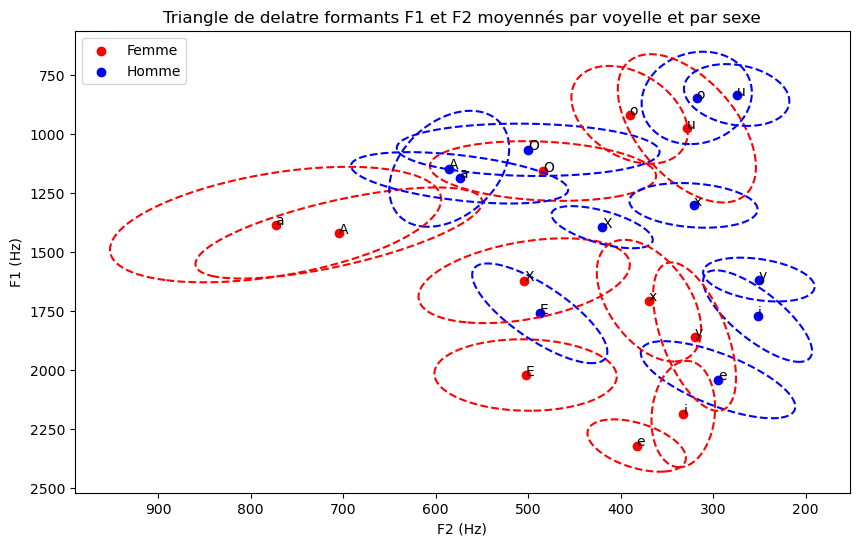

In [86]:
plt.figure(figsize=(10, 6))

#On rajoute les ellipses
# Ellipses de dispersion pour les femmes par voyelle
for vowel in np.unique(data['vowel']):
    i_f = np.where((data['sex'] == 'F') & (data['vowel'] == vowel))[0] #selection indice
    e_fx, e_fy = ellipse_from_points(data['F2'][i_f], data['F1'][i_f])
    plt.plot(e_fy, e_fx, color='red',linestyle='--')
    
    # Ellipses de dispersion pour les hommes par voyell
    i_h = np.where((data['sex'] == 'H') & (data['vowel'] == vowel))[0]
    e_hx, e_hy = ellipse_from_points(data['F2'][i_h], data['F1'][i_h])
    plt.plot(e_hy, e_hx, color='blue',linestyle='--')
    
plt.scatter(F1_femme, F2_femme, color='red', label='Femme')
plt.scatter(F1_homme, F2_homme, color='blue', label='Homme')

# etiquettes pour chaque point
for i, vowel in enumerate(np.unique(data['vowel'])):
    plt.text(F1_femme[i], F2_femme[i], vowel)
    plt.text(F1_homme[i], F2_homme[i], vowel)

plt.gca().invert_yaxis()
plt.gca().invert_xaxis()

plt.xlabel('F2 (Hz)')
plt.ylabel('F1 (Hz)')
plt.title('Triangle de delatre formants F1 et F2 moyennés par voyelle et par sexe')
plt.legend()
plt.show()

#ellipes bleu homme 
#ellispe rouge femme

2. Pouvez-vous associer les ellipses aux voyelles ?  Que peut-on conclure
sur la variabilité inter-locuteurs et sur la possibilité de construire un
système automatique de reconnaissance de voyelles ?


On retrouve bien le triangle de Delattre (voyelles en fonction des formants F1 et F2). Comme nous l'avons vu lors du TP 1, nous savons maintenant identifier les voyelles. J'ai pris l'initiative d'étiqueter les voyelles pour une meilleure visibilité dans l'analyse.

En fonction des hommes et des femmes, l'emplacement des voyelles est différent. Les formants des femmes sont plus élevés que ceux des hommes (fréquence plus aiguë), comme pour les voyelles /a/ ou encore /ɑ/.

Lorsque l'on compare les autres voyelles, nous remarquons également une différence d'emplacement entre hommes et femmes. Si l'on s'intéresse aux ellipses, pour certaines voyelles, les ellipses des voyelles des hommes et des femmes se superposent, par exemple /ɛ/, /o/ et /u/. On remarque que les ellipses des voyelles respectives des hommes et des femmes se superposent plus ou moins.

La variabilité interlocuteur (due aux différences génétiques entre hommes et femmes) ne peut pas être négligée si l'on développe un modèle de reconnaissance de voyelles. Cela a une conséquence directe sur la forme spectrale (résultant des résonateurs donc des formants). Il faut prendre en compte le sexe de l'interlocuteur pour pouvoir adapter au mieux le système automatique de reconnaissance de voyelles. Soit on demande le sexe, soit en fonction de F0 pitch on cherche si c'est h/f et puis on considère ça pour comparer les formants</span>